# K-Means Clustering

K-means is an **unsupervised learning** algorithm that learns the features of a dataset and assigns groups ("k" clusters) based on similarities. These groups are classified by their distance to a **centroid**, which is the mean average of a cluster group. K-means can help identify data points that exhibit similar behaviors. This can be used to find trends in the existing data and/or categorize new data points that have similar features to the established cluster groups.

In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

# Credit Cards


The credit cards dataset (https://www.kaggle.com/arjunbhasin2013/ccdata) summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.



####  We want to develop a customer segmentation to define marketing strategy

- we will use the K-Means Clustering algorithm to explore patterns in the dataset. 
- we will compar what do the clustering patterns of credit limit vs balance look like?
- Try to discover what makes each cluster distinct from another
- we will Use visualization to identify trends in this data.
 

In [2]:
# read file into dataframe
filepath = "datasets/credit_card.csv"

df = pd.read_csv(filepath)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

## Statistical Analysis

Before using the K-Means algorithm to find similar customer groups, we will explore the distributions for the features of our data, as well as some descriptive statistics. This may be useful to determine how many clusters we should set the K-Means algorithm to assign the customers.

- we will limit our analysis to  analyze the behavior of credit card holders based on their balance amount left in their account , limit of credit card, and amount of purchases made from account

In [4]:
# dataframe that will be used in this analysis
df = df[['BALANCE', 'PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT']]
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT
0,40.900749,95.40,0.000000,1000.0
1,3202.467416,0.00,6442.945483,7000.0
2,2495.148862,773.17,0.000000,7500.0
3,1666.670542,1499.00,205.788017,7500.0
4,817.714335,16.00,0.000000,1200.0


In [5]:
df.shape

(8950, 4)

In [6]:
df.dtypes

BALANCE         float64
PURCHASES       float64
CASH_ADVANCE    float64
CREDIT_LIMIT    float64
dtype: object

In [7]:
# check for missing values
df.isnull().sum()

BALANCE         0
PURCHASES       0
CASH_ADVANCE    0
CREDIT_LIMIT    1
dtype: int64

In [8]:
df.dropna(subset=['CREDIT_LIMIT'], inplace = True)

In [9]:
len(df)

8949

In [10]:
#overall descriptive statistics
df.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT
count,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,1003.316936,978.959616,4494.449450
std,2081.584016,2136.727848,2097.264344,3638.815725
min,0.000000,0.000000,0.000000,50.000000
25%,128.365782,39.800000,0.000000,1600.000000
50%,873.680279,361.490000,0.000000,3000.000000
75%,2054.372848,1110.170000,1113.868654,6500.000000
max,19043.138560,49039.570000,47137.211760,30000.000000


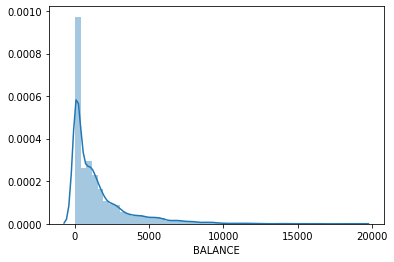

In [11]:
# distribution of customer balance
sns.distplot(df['BALANCE'])

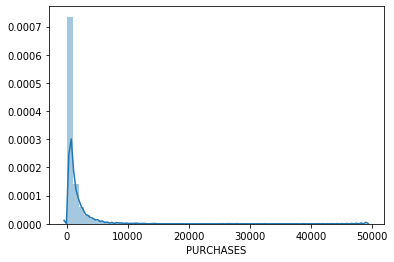

In [12]:
# distribution of customer purchases
sns.distplot(df['PURCHASES'])

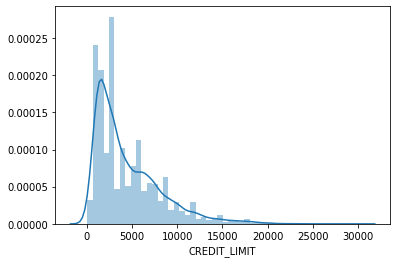

In [13]:
# distribution of customer credit limit
sns. distplot(df['CREDIT_LIMIT'])

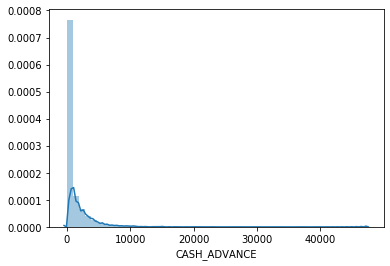

In [14]:
# distribution of customer cash advance
sns. distplot(df['CASH_ADVANCE'])

In [15]:
# function to assign credit limit groups
def credit_groups(credit):
    if credit < 3500:
        group = 'low credit_limit'
    elif credit <= 5500:
        group = 'median credit_limit'
    else:
        group = 'high credit_limit'

        
    return group

In [16]:
# use function on "CREDIT_LIMIT" column
df['credit_groups'] = df['CREDIT_LIMIT'].apply(credit_groups)

In [17]:
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,credit_groups
0,40.900749,95.40,0.000000,1000.0,low credit_limit
1,3202.467416,0.00,6442.945483,7000.0,high credit_limit
2,2495.148862,773.17,0.000000,7500.0,high credit_limit
3,1666.670542,1499.00,205.788017,7500.0,high credit_limit
4,817.714335,16.00,0.000000,1200.0,low credit_limit


In [18]:
# function to assign balance groups
def balance_groups(balance):
    if balance < 1565:
        group = 'low balance'
    
    else:
        group = 'high balance'

        
    return group

In [19]:
# use function on "BALANCE" column
df['balance_groups'] = df['BALANCE'].apply(balance_groups)

In [20]:
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,credit_groups,balance_groups
0,40.900749,95.40,0.000000,1000.0,low credit_limit,low balance
1,3202.467416,0.00,6442.945483,7000.0,high credit_limit,high balance
2,2495.148862,773.17,0.000000,7500.0,high credit_limit,high balance
3,1666.670542,1499.00,205.788017,7500.0,high credit_limit,high balance
4,817.714335,16.00,0.000000,1200.0,low credit_limit,low balance


In [21]:
index_val = ['balance_groups', 'credit_groups']

# mean average purchases by credit grop, and balance group
pd.pivot_table(data= df, index=index_val, values=['PURCHASES'])

PURCHASES
balance_groups credit_groups                   
high balance   high credit_limit    1998.813974
               low credit_limit      484.629604
               median credit_limit   879.826773
low balance    high credit_limit    1611.546031
               low credit_limit      519.272607
               median credit_limit  1078.680261

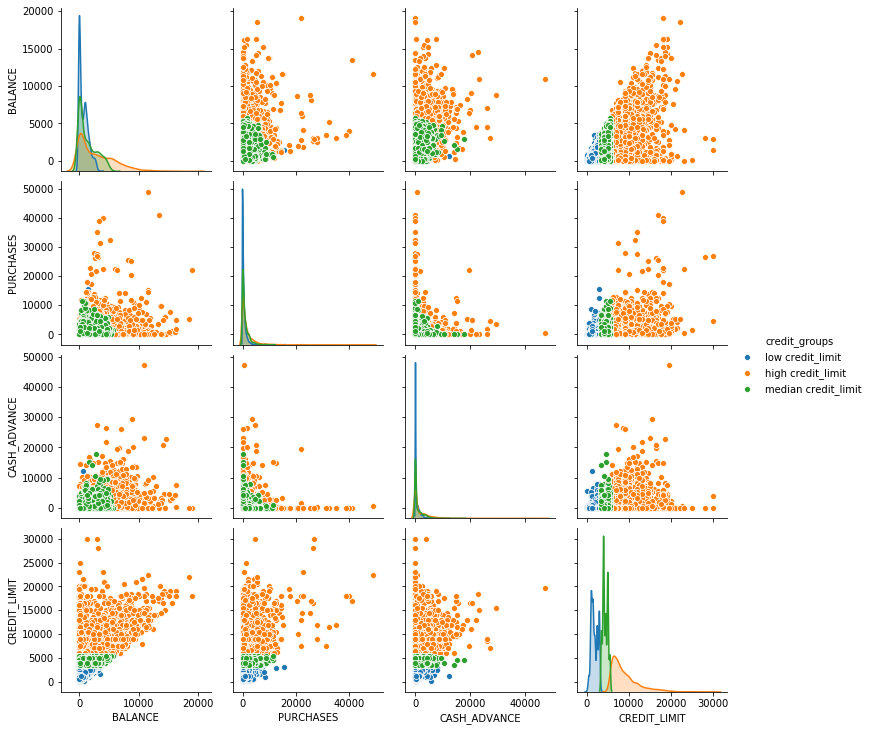

In [22]:
# compare balance and purchases by credit group
sns.pairplot(data=df, hue="credit_groups")

# K-Means Model


We will use the `KMeans` function to create five clusters (`n_clusters=`) and analyze the characteristics of each cluster. 

In [23]:
# dataframe that will be used in algorithm
X = df[['BALANCE', 'PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT']]
X.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT
0,40.900749,95.40,0.000000,1000.0
1,3202.467416,0.00,6442.945483,7000.0
2,2495.148862,773.17,0.000000,7500.0
3,1666.670542,1499.00,205.788017,7500.0
4,817.714335,16.00,0.000000,1200.0


In [24]:
# initialize KMeans to create 3 clusters
kmeans = KMeans(n_clusters=3)

In [25]:
# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
# centroid columns are in order of dataframe columns index(0=BALANCE, 1=PURCHASES, 2=CASH_ADVANCE, 3=CREDIT_LIMIT) 
kmeans.cluster_centers_

array([[ 1986.67940592,  1387.30788031,  1121.55291944,  7005.71077571],
       [ 5706.67725857,  3009.19771725,  4000.67862106, 12422.56809339],
       [  797.54536141,   548.57988726,   495.94923502,  2236.62083433]])

In [27]:
# create column in original dataframe with cluster group number
df['cluster'] = kmeans.labels_
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,credit_groups,balance_groups,cluster
0,40.900749,95.40,0.000000,1000.0,low credit_limit,low balance,2
1,3202.467416,0.00,6442.945483,7000.0,high credit_limit,high balance,0
2,2495.148862,773.17,0.000000,7500.0,high credit_limit,high balance,0
3,1666.670542,1499.00,205.788017,7500.0,high credit_limit,high balance,0
4,817.714335,16.00,0.000000,1200.0,low credit_limit,low balance,2


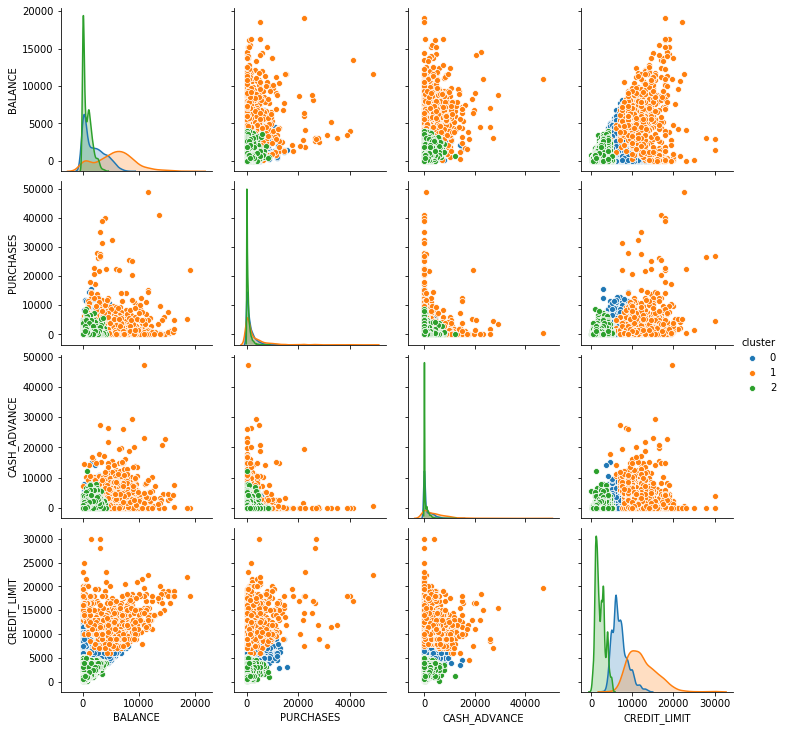

In [28]:
# compare all numerical features by cluster group
sns.pairplot(data=df, hue='cluster')

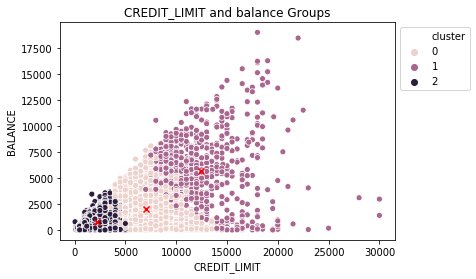

In [29]:
# compare "CREDIT_LIMIT" and "balance"
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='BALANCE', hue='cluster')

# scatterplot of centroid coordinates for credit limit and balance
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 0], c='red', marker='x')

plt.title("CREDIT_LIMIT and balance Groups")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [30]:
df['cluster'].unique()

array([2, 0, 1])

In [31]:
# select a cluster from dataframe
cluster = df.loc[df['cluster'] == 0]
cluster.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,credit_groups,balance_groups,cluster
1,3202.467416,0.00,6442.945483,7000.0,high credit_limit,high balance,0
2,2495.148862,773.17,0.000000,7500.0,high credit_limit,high balance,0
3,1666.670542,1499.00,205.788017,7500.0,high credit_limit,high balance,0
8,1014.926473,861.49,0.000000,7000.0,high credit_limit,low balance,0
9,152.225975,1281.60,0.000000,11000.0,high credit_limit,low balance,0


In [32]:
# number of customers in this cluster
len(cluster)

2584

In [33]:
# select a cluster from dataframe
cluster1 = df.loc[df['cluster'] == 1]
cluster1.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,credit_groups,balance_groups,cluster
6,627.260806,7091.01,0.000000,13500.0,high credit_limit,low balance,1
15,6886.213231,1611.70,2301.491267,8000.0,high credit_limit,high balance,1
18,1989.072228,504.35,0.000000,13000.0,high credit_limit,high balance,1
21,6369.531318,6359.95,229.028245,11250.0,high credit_limit,high balance,1
23,3800.151377,4248.35,7974.415626,9000.0,high credit_limit,high balance,1


In [34]:
# number of customers in this cluster
len(cluster1)

769

In [35]:
# select a cluster from dataframe
cluster2 = df.loc[df['cluster'] == 2]
cluster2.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,credit_groups,balance_groups,cluster
0,40.900749,95.40,0.0,1000.0,low credit_limit,low balance,2
4,817.714335,16.00,0.0,1200.0,low credit_limit,low balance,2
5,1809.828751,1333.28,0.0,1800.0,low credit_limit,high balance,2
7,1823.652743,436.20,0.0,2300.0,low credit_limit,high balance,2
10,1293.124939,920.12,0.0,1200.0,low credit_limit,low balance,2


In [36]:
# number of customers in this cluster
len(cluster2)

5596

In [37]:
# descriptive statistics for this cluster
cluster2.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,cluster
count,5596.000000,5596.000000,5596.000000,5596.000000,5596.0
mean,799.143554,548.477034,497.870712,2239.767195,2.0
std,825.072489,809.014414,929.176978,1108.052308,0.0
min,0.000000,0.000000,0.000000,50.000000,2.0
25%,72.372161,18.320000,0.000000,1200.000000,2.0
50%,542.044001,259.995000,0.000000,2000.000000,2.0
75%,1276.506014,700.312500,658.400165,3000.000000,2.0
max,4028.036480,8591.310000,12281.834390,5200.000000,2.0


In [39]:
# sort the cluster numbers from min(0) to max(2)
sorted_clusters = sorted(df['cluster'].unique())

# select the rows of the same cluster number
# then get min/max credit limit and average balance
print("Cluster credit limit Ranges\n")
for cluster_num in sorted_clusters:
    
    small_df = df.loc[df['cluster'] == cluster_num]
    
    min_credit = small_df['CREDIT_LIMIT'].min()
    max_credit = small_df['CREDIT_LIMIT'].max()
    avg_balance = small_df['BALANCE'].mean()
    
    print(f"Cluster {cluster_num}: ${min_credit}-{max_credit}K, avg balance: {int(avg_balance)}")

Cluster credit limit Ranges

Cluster 0: $2800.0-14000.0K, avg balance: 1986
Cluster 1: $4500.0-30000.0K, avg balance: 5716
Cluster 2: $50.0-5200.0K, avg balance: 799


In [40]:
# sort the cluster numbers from min(0) to max(2)
sorted_clusters = sorted(df['cluster'].unique())

# select the rows of the same cluster number
# then get min/max credit limit and average balance
print("Cluster credit limit Ranges\n")
for cluster_num in sorted_clusters:
    
    small_df = df.loc[df['cluster'] == cluster_num]
    
    min_credit = small_df['CREDIT_LIMIT'].min()
    max_credit = small_df['CREDIT_LIMIT'].max()
    avg_chashAdvance = small_df['CASH_ADVANCE'].mean()
    
    print(f"Cluster {cluster_num}: ${min_credit}-{max_credit}K,  avg chash advance: {int( avg_chashAdvance)}")

Cluster credit limit Ranges

Cluster 0: $2800.0-14000.0K,  avg chash advance: 1118
Cluster 1: $4500.0-30000.0K,  avg chash advance: 4009
Cluster 2: $50.0-5200.0K,  avg chash advance: 497


### Customer Segments

After analyzing the credit limit ranges and average balance of each clusters, we identified these groups of credit card holders behavior:

- group 1: customer with median credit limit , carry a median balance, and take and avg cash in advance around 1120
- group 2: customer with low  credit limit , carry a low balance, and take and avg cash in advance around 498
- group 3: customer wth high credit limit , carry a high balance, and take and avg cash in advance around 4026

